In [2]:
import trumps_no_pile as tnp
import fake_bots_architecture as far
import numpy as np

def random_player(playable_cards,pile,trump):
    '''input: playable cards, cards on the pile and the trump
    returns an action'''
    return np.random.choice(playable_cards)

def max_player(playable_cards,pile,trump):
    '''input: playable cards, cards on the pile and the trump
    returns an action based off max cards'''
    cards_mod_13 = np.array(playable_cards)%13
    return playable_cards[np.argmax(cards_mod_13)]

def min_player(playable_cards,pile,trump):
    '''input: playable cards, cards on the pile and the trump
    returns an action based off min card'''
    cards_mod_13 = np.array(playable_cards)%13
    return playable_cards[np.argmin(cards_mod_13)]

def great_player(playable_cards,pile,trump):
    cards = playable_cards
    if pile is None:
        return max_player(playable_cards,pile,trump)
    else:
        cards_same_suit = [i for i in cards if i//13 == pile//13]
        if len(cards_same_suit) > 0:
            cards_that_will_win = [i for i in cards_same_suit if i%13 > pile%13]
            if len(cards_that_will_win) > 0:
                return min(cards_that_will_win)
            else:
                return min(cards_same_suit)
        else:
            trump_cards = [i for i in cards if i//13 == trump]
            if len(trump_cards) > 0:
                return min(trump_cards)
            else:
                card_numbers = np.array(cards)%13
                card_to_play_position  = np.argmax(card_numbers)
                return cards[card_to_play_position]

def moving_average(x, w=500):
    return np.convolve(x, np.ones(w), 'valid') / w

def simulate(player_func=random_player,env=far.SuperTrumps()):
    total_rewards = []
    for i in range(5000):
        s, pc = env.reset() #state is cards,pile,trump
        reward_total = 0
        for step in range(102):
            action = player_func(pc,s[1],s[2])
            s,reward,done,pc = env.step(action)
            reward_total += reward

            if done:
                total_rewards.append(reward_total)
                break
    return total_rewards

In [10]:
list_of_rewards,labels= [],[]
env = far.SuperTrumps(num_cards=5,just_first=False)
list_of_rewards.append(simulate(random_player,env))
list_of_rewards.append(simulate(max_player,env))
list_of_rewards.append(simulate(min_player,env))
list_of_rewards.append(simulate(great_player,env))
labels = ['random','max_player','min_player','great_player']

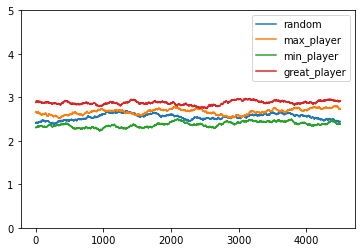

In [12]:
for j,lst in enumerate(list_of_rewards):
    mar = moving_average(lst,500)
    plt.plot(range(len(mar)),mar,label=labels[j])
    
plt.ylim(0,5)
plt.legend()
plt.show()

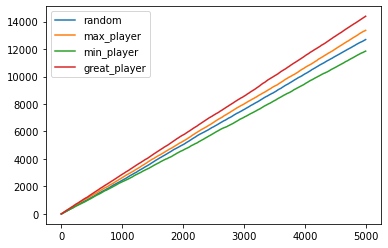

In [13]:
for j,lst in enumerate(list_of_rewards):
    mar = np.cumsum(lst)
    plt.plot(range(len(mar)),mar,label=labels[j])
    
plt.legend()
plt.show()